In [1]:
import requests, zipfile
import numpy as np
from zipfile import ZipFile
from pathlib import Path
import cv2,os,imghdr
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
device = 'cuda' if tf.test.is_gpu_available() else 'cpu'
device

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


'cuda'

In [2]:
import os
import shutil
from pathlib import Path

data_path = Path('data/')
happy_path = Path(data_path / 'happy')
sad_path = Path(data_path / 'sad')

if happy_path.is_dir():
  print(f'{happy_path} path already exists')
else:
  print(f'Creating {happy_path} path')
  happy_path.mkdir(parents=True,exist_ok=True)

with open('Happy.zip','wb') as f:
  url = 'https://github.com/raviteja6031/CNN-Image-Classification/raw/main/Happy.zip'
  request = requests.get(url)
  f.write(request.content)

with ZipFile('Happy.zip','r') as zip_file:
  print('unzipping the data')
  zip_file.extractall(happy_path)

with open('Sad.zip','wb') as f:
  url = 'https://github.com/raviteja6031/CNN-Image-Classification/raw/main/Sad.zip'
  request = requests.get(url)
  f.write(request.content)

with ZipFile('Sad.zip','r') as zip_file:
  print('unzipping the data')
  zip_file.extractall(sad_path)

# Remove all files and directories except 'happy' and 'sad'
for entry in os.listdir(data_path):
    entry_path = data_path / entry
    if entry != 'happy' and entry != 'sad':
        if entry_path.is_dir():
            shutil.rmtree(entry_path)
        else:
            os.remove(entry_path)

# Remove all files and directories except 'happy' and 'sad'
for entry in os.listdir(data_path):
    entry_path = data_path / entry
    if entry != 'happy' and entry != 'sad':
        if entry_path.is_dir():
            shutil.rmtree(entry_path)
        else:
            os.remove(entry_path)

# Move files from nested directories to data/happy
for root, dirs, files in os.walk(happy_path):
    for dir in dirs:
        dir_path = os.path.join(root, dir)
        for file in os.listdir(dir_path):
            file_path = os.path.join(dir_path, file)
            if os.path.isfile(file_path):
                shutil.move(file_path, happy_path)
        shutil.rmtree(dir_path)

print(f"Image files are now directly present in {happy_path}")

# Move files from nested directories to data/happy
for root, dirs, files in os.walk(sad_path):
    for dir in dirs:
        dir_path = os.path.join(root, dir)
        for file in os.listdir(dir_path):
            file_path = os.path.join(dir_path, file)
            if os.path.isfile(file_path):
                shutil.move(file_path, sad_path)
        shutil.rmtree(dir_path)

print(f"Image files are now directly present in {sad_path}")

Creating data/happy path
unzipping the data
unzipping the data
Image files are now directly present in data/happy
Image files are now directly present in data/sad


In [3]:
import os
def walk_through_dir(dir_path):
  """Walks through dir_path returning its content"""
  for dirpath, dirname, filename in os.walk(dir_path):
    print(f'There are {len(dirname)} directories and {len(filename)} images in {dirpath}')

walk_through_dir(data_path)

There are 2 directories and 0 images in data
There are 0 directories and 6077 images in data/sad
There are 0 directories and 8989 images in data/happy


In [4]:
img_exts = ['jpeg','jpg','png','bmp']

In [5]:
for image_class in os.listdir(data_path):
    for image in os.listdir(os.path.join(data_path, image_class)):
        image_path = os.path.join(data_path, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in img_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))

Image not in ext list data/happy/.DS_Store


In [6]:
from PIL import Image
import os

def get_image_sizes(folder_path):
    image_sizes = {}

    # Get a list of all files in the folder
    files = os.listdir(folder_path)

    for file_name in files:
        # Check if the file is an image (you can add more image extensions as needed)
        if file_name.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp', '.tiff')):
            file_path = os.path.join(happy_path, file_name)

            try:
                # Open the image using PIL
                with Image.open(file_path) as img:
                    # Get the size of the image
                    width, height = img.size
                    file_size = os.path.getsize(file_path)

                    if file_size < 1024:  # Size less than 10KB (1KB = 1024 bytes)
                        os.remove(file_path)
                        print(f"Removed {file_name} - Size: {file_size} bytes")
                    else:
                        image_sizes[file_name] = (width, height)
            except Exception as e:
                # Handle any exceptions (e.g., if the file is not a valid image)
                print(f"Error processing {file_name}: {e}")

    return image_sizes

# Provide the path to the folder containing the images
folder_path = 'data/happy'
image_sizes = get_image_sizes(folder_path)

# Display the image sizes
for file_name, size in image_sizes.items():
    print(f"{file_name}: {size[0]}x{size[1]}")

Streaming output truncated to the last 5000 lines.
27040.png: 48x48
31346.png: 48x48
26951.png: 48x48
9967.png: 48x48
11476.png: 48x48
4676.png: 48x48
22663.png: 48x48
27519.png: 48x48
10224.png: 48x48
3847.png: 48x48
30105.png: 48x48
19026.png: 48x48
14385.png: 48x48
17507.png: 48x48
31233.png: 48x48
14430.png: 48x48
6217.png: 48x48
30348.png: 48x48
31927.png: 48x48
13661.png: 48x48
27042.png: 48x48
22446.png: 48x48
7298.png: 48x48
34828.png: 48x48
5182.png: 48x48
28632.png: 48x48
30855.png: 48x48
19451.png: 48x48
4128.png: 48x48
33353.png: 48x48
31734.png: 48x48
16200.png: 48x48
24025.png: 48x48
14765.png: 48x48
3440.png: 48x48
827.png: 48x48
2472.png: 48x48
24585.png: 48x48
16269.png: 48x48
26930.png: 48x48
35555.png: 48x48
34882.png: 48x48
1076.png: 48x48
31359.png: 48x48
18127.png: 48x48
2767.png: 48x48
30693.png: 48x48
34435.png: 48x48
1141.png: 48x48
31329.png: 48x48
28754.png: 48x48
21341.png: 48x48
9641.png: 48x48
23114.png: 48x48
5238.png: 48x48
14112.png: 48x48
19370.png: 48

In [7]:
def walk_through_dir(dir_path):
  """Walks through dir_path returning its content"""
  for dirpath, dirname, filename in os.walk(dir_path):
    print(f'There are {len(dirname)} directories and {len(filename)} images in {dirpath}')

walk_through_dir(data_path)

There are 2 directories and 0 images in data
There are 0 directories and 6077 images in data/sad
There are 0 directories and 8977 images in data/happy


In [8]:
from PIL import Image
import os

def get_image_sizes(folder_path):
    image_sizes = {}

    # Get a list of all files in the folder
    files = os.listdir(folder_path)

    for file_name in files:
        # Check if the file is an image (you can add more image extensions as needed)
        if file_name.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp', '.tiff')):
            file_path = os.path.join(happy_path, file_name)

            try:
                # Open the image using PIL
                with Image.open(file_path) as img:
                    # Get the size of the image
                    width, height = img.size
                    file_size = os.path.getsize(file_path)

                    if file_size < 1024:  # Size less than 10KB (1KB = 1024 bytes)
                        os.remove(file_path)
                        print(f"Removed {file_name} - Size: {file_size} bytes")
                    else:
                        image_sizes[file_name] = (width, height)
            except Exception as e:
                # Handle any exceptions (e.g., if the file is not a valid image)
                print(f"Error processing {file_name}: {e}")

    return image_sizes

# Provide the path to the folder containing the images
folder_path = 'data/happy'
image_sizes = get_image_sizes(folder_path)

# Display the image sizes
for file_name, size in image_sizes.items():
    print(f"{file_name}: {size[0]}x{size[1]}")

Streaming output truncated to the last 5000 lines.
27040.png: 48x48
31346.png: 48x48
26951.png: 48x48
9967.png: 48x48
11476.png: 48x48
4676.png: 48x48
22663.png: 48x48
27519.png: 48x48
10224.png: 48x48
3847.png: 48x48
30105.png: 48x48
19026.png: 48x48
14385.png: 48x48
17507.png: 48x48
31233.png: 48x48
14430.png: 48x48
6217.png: 48x48
30348.png: 48x48
31927.png: 48x48
13661.png: 48x48
27042.png: 48x48
22446.png: 48x48
7298.png: 48x48
34828.png: 48x48
5182.png: 48x48
28632.png: 48x48
30855.png: 48x48
19451.png: 48x48
4128.png: 48x48
33353.png: 48x48
31734.png: 48x48
16200.png: 48x48
24025.png: 48x48
14765.png: 48x48
3440.png: 48x48
827.png: 48x48
2472.png: 48x48
24585.png: 48x48
16269.png: 48x48
26930.png: 48x48
35555.png: 48x48
34882.png: 48x48
1076.png: 48x48
31359.png: 48x48
18127.png: 48x48
2767.png: 48x48
30693.png: 48x48
34435.png: 48x48
1141.png: 48x48
31329.png: 48x48
28754.png: 48x48
21341.png: 48x48
9641.png: 48x48
23114.png: 48x48
5238.png: 48x48
14112.png: 48x48
19370.png: 48

In [9]:
from PIL import Image
import os

def get_image_sizes(folder_path):
    image_sizes = {}

    # Get a list of all files in the folder
    files = os.listdir(folder_path)

    for file_name in files:
        # Check if the file is an image (you can add more image extensions as needed)
        if file_name.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp', '.tiff')):
            file_path = os.path.join(sad_path, file_name)

            try:
                # Open the image using PIL
                with Image.open(file_path) as img:
                    # Get the size of the image
                    width, height = img.size
                    file_size = os.path.getsize(file_path)

                    if file_size < 1024:  # Size less than 10KB (1KB = 1024 bytes)
                        os.remove(file_path)
                        print(f"Removed {file_name} - Size: {file_size} bytes")
                    else:
                        image_sizes[file_name] = (width, height)
            except Exception as e:
                # Handle any exceptions (e.g., if the file is not a valid image)
                print(f"Error processing {file_name}: {e}")

    return image_sizes

# Provide the path to the folder containing the images
folder_path = 'data/sad'
image_sizes = get_image_sizes(folder_path)

# Display the image sizes
for file_name, size in image_sizes.items():
    print(f"{file_name}: {size[0]}x{size[1]}")

Streaming output truncated to the last 5000 lines.
20964.png: 48x48
34821.png: 48x48
20301.png: 48x48
22766.png: 48x48
12248.png: 48x48
35263.png: 48x48
19934.png: 48x48
17068.png: 48x48
33294.png: 48x48
15731.png: 48x48
8604.png: 48x48
21356.png: 48x48
14130.png: 48x48
22961.png: 48x48
18995.png: 48x48
35457.png: 48x48
21001.png: 48x48
11950.png: 48x48
24334.png: 48x48
7385.png: 48x48
34575.png: 48x48
17887.png: 48x48
19104.png: 48x48
32126.png: 48x48
22412.png: 48x48
21549.png: 48x48
14136.png: 48x48
10412.png: 48x48
16174.png: 48x48
14800.png: 48x48
24606.png: 48x48
17675.png: 48x48
20504.png: 48x48
9142.png: 48x48
29025.png: 48x48
13404.png: 48x48
28966.png: 48x48
2382.png: 48x48
18866.png: 48x48
29854.png: 48x48
5569.png: 48x48
42.png: 48x48
29998.png: 48x48
6210.png: 48x48
23297.png: 48x48
18919.png: 48x48
26747.png: 48x48
20440.png: 48x48
24615.png: 48x48
4406.png: 48x48
7554.png: 48x48
7091.png: 48x48
14731.png: 48x48
18180.png: 48x48
11298.png: 48x48
14545.png: 48x48
33766.png

In [10]:
from PIL import Image
import os

def convert_images(folder_path, desired_size=(224, 224)):
    files = os.listdir(folder_path)
    for file_name in files:
        if file_name.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp', '.tiff')):
            file_path = os.path.join(folder_path, file_name)
            try:
                with Image.open(file_path) as img:
                    width, height = img.size
                    if (width, height) != desired_size:
                        img = img.resize(desired_size)
                        img.save(file_path)
                        print(f"Converted {file_name} to {desired_size[0]}x{desired_size[1]}")
            except Exception as e:
                print(f"Error processing {file_name}: {e}")

# Provide the path to the folder containing the images
folder_path = 'data/sad'
convert_images(folder_path, desired_size=(224, 224))

Streaming output truncated to the last 5000 lines.
Converted 20964.png to 224x224
Converted 34821.png to 224x224
Converted 20301.png to 224x224
Converted 22766.png to 224x224
Converted 12248.png to 224x224
Converted 35263.png to 224x224
Converted 19934.png to 224x224
Converted 17068.png to 224x224
Converted 33294.png to 224x224
Converted 15731.png to 224x224
Converted 8604.png to 224x224
Converted 21356.png to 224x224
Converted 14130.png to 224x224
Converted 22961.png to 224x224
Converted 18995.png to 224x224
Converted 35457.png to 224x224
Converted 21001.png to 224x224
Converted 11950.png to 224x224
Converted 24334.png to 224x224
Converted 7385.png to 224x224
Converted 34575.png to 224x224
Converted 17887.png to 224x224
Converted 19104.png to 224x224
Converted 32126.png to 224x224
Converted 22412.png to 224x224
Converted 21549.png to 224x224
Converted 14136.png to 224x224
Converted 10412.png to 224x224
Converted 16174.png to 224x224
Converted 14800.png to 224x224
Converted 24606.png t

In [11]:
from PIL import Image
import os

def convert_images(folder_path, desired_size=(224, 224)):
    files = os.listdir(folder_path)
    for file_name in files:
        if file_name.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp', '.tiff')):
            file_path = os.path.join(folder_path, file_name)
            try:
                with Image.open(file_path) as img:
                    width, height = img.size
                    if (width, height) != desired_size:
                        img = img.resize(desired_size)
                        img.save(file_path)
                        print(f"Converted {file_name} to {desired_size[0]}x{desired_size[1]}")
            except Exception as e:
                print(f"Error processing {file_name}: {e}")

# Provide the path to the folder containing the images
folder_path = 'data/happy'
convert_images(folder_path, desired_size=(224, 224))

Streaming output truncated to the last 5000 lines.
Converted 27040.png to 224x224
Converted 31346.png to 224x224
Converted 26951.png to 224x224
Converted 9967.png to 224x224
Converted 11476.png to 224x224
Converted 4676.png to 224x224
Converted 22663.png to 224x224
Converted 27519.png to 224x224
Converted 10224.png to 224x224
Converted 3847.png to 224x224
Converted 30105.png to 224x224
Converted 19026.png to 224x224
Converted 14385.png to 224x224
Converted 17507.png to 224x224
Converted 31233.png to 224x224
Converted 14430.png to 224x224
Converted 6217.png to 224x224
Converted 30348.png to 224x224
Converted 31927.png to 224x224
Converted 13661.png to 224x224
Converted 27042.png to 224x224
Converted 22446.png to 224x224
Converted 7298.png to 224x224
Converted 34828.png to 224x224
Converted 5182.png to 224x224
Converted 28632.png to 224x224
Converted 30855.png to 224x224
Converted 19451.png to 224x224
Converted 4128.png to 224x224
Converted 33353.png to 224x224
Converted 31734.png to 224

In [12]:
def check_image_sizes(folder_path,file_path):
    small_images = []

    # Get a list of all files in the folder
    files = os.listdir(folder_path)

    for file_name in files:
        # Check if the file is an image (you can add more image extensions as needed)
        if file_name.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp', '.tiff')):
            file_path = file_path

            try:
                # Get the size of the image
                file_size = os.path.getsize(file_path)

                if file_size < 1024:  # Size less than 10KB (10KB = 10240 bytes)
                    small_images.append(file_name)
            except Exception as e:
                # Handle any exceptions (e.g., if the file is not a valid image)
                print(f"Error processing {file_name}: {e}")

    return small_images

In [13]:
# Provide the path to the folder containing the images
file_path = os.path.join(sad_path, file_name)
folder_path = 'data/sad'
small_images = check_image_sizes(folder_path,file_path)

if small_images:
    print("The following images are less than 1KB in sad folder:")
    for image in small_images:
        print(image)
else:
    print("No images found with a size less than 1KB in sad folder.")


No images found with a size less than 1KB in sad folder.


In [14]:
import os

def check_image_sizes(folder_path):
    small_images = []

    # Get a list of all files in the folder
    files = os.listdir(folder_path)

    for file_name in files:
        # Check if the file is an image (you can add more image extensions as needed)
        if file_name.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp', '.tiff')):
            file_path = os.path.join(happy_path, file_name)

            try:
                # Get the size of the image
                file_size = os.path.getsize(file_path)

                if file_size < 1024:  # Size less than 10KB (10KB = 10240 bytes)
                    small_images.append(file_name)
                    # print(file_name)
            except Exception as e:
                # Handle any exceptions (e.g., if the file is not a valid image)
                print(f"Error processing {file_name}: {e}")

    return small_images

# Provide the path to the folder containing the images
folder_path = 'data/happy'
small_images = check_image_sizes(folder_path)

if small_images:
    print("The following images are less than 1KB:")
    for image in small_images:
        print(image)
else:
    print("No images found with a size less than 1KB.")

No images found with a size less than 1KB.


In [15]:
img = cv2.imread(os.path.join('data','happy','10000.png'))

(-0.5, 223.5, 223.5, -0.5)

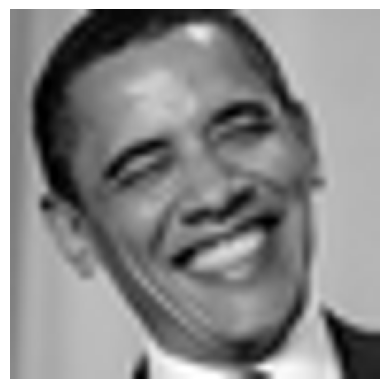

In [16]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.axis(False)

In [17]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 15050 files belonging to 2 classes.


In [18]:
data_iterator = data.as_numpy_iterator() #helpful when using very large dataset
data_iterator

In [19]:
batch = data_iterator.next()
batch

(array([[[[255.      , 255.      , 255.      ],
          [255.      , 255.      , 255.      ],
          [255.      , 255.      , 255.      ],
          ...,
          [252.25    , 252.25    , 252.25    ],
          [255.      , 255.      , 255.      ],
          [255.      , 255.      , 255.      ]],
 
         [[255.      , 255.      , 255.      ],
          [255.      , 255.      , 255.      ],
          [255.      , 255.      , 255.      ],
          ...,
          [251.4375  , 251.4375  , 251.4375  ],
          [254.33984 , 254.33984 , 254.33984 ],
          [255.      , 255.      , 255.      ]],
 
         [[255.      , 255.      , 255.      ],
          [255.      , 255.      , 255.      ],
          [255.      , 255.      , 255.      ],
          ...,
          [250.5625  , 250.5625  , 250.5625  ],
          [253.5     , 253.5     , 253.5     ],
          [254.3125  , 254.3125  , 254.3125  ]],
 
         ...,
 
         [[ 75.75    ,  75.75    ,  75.75    ],
          [ 78.187

In [20]:
# 0 for happy
# 1 for sad
batch[1]

array([0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int32)

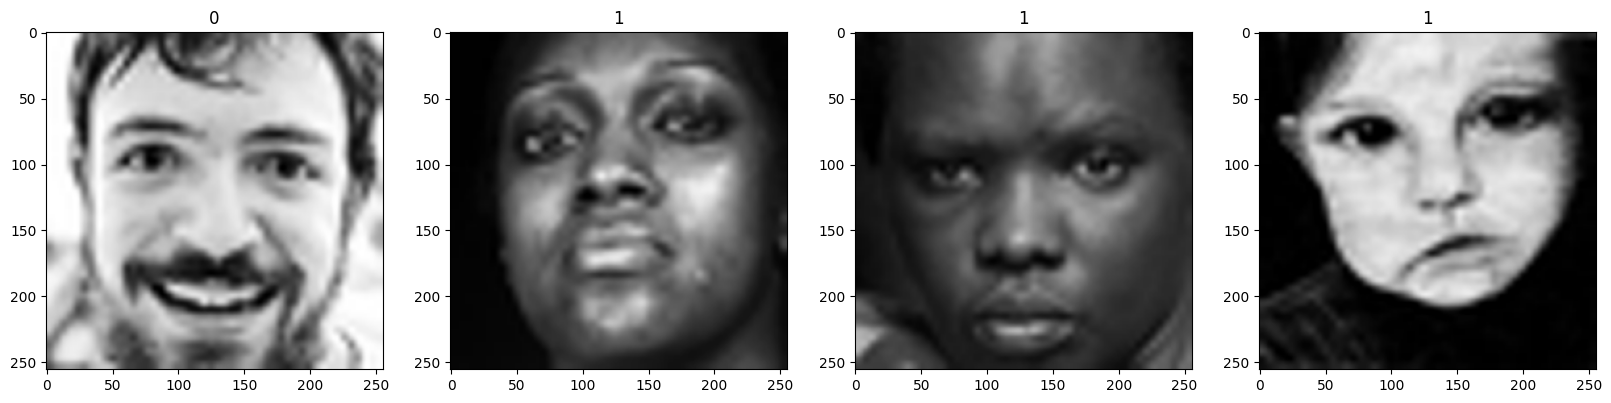

In [21]:
fig,ax = plt.subplots(ncols=4,figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

In [22]:
data = data.map(lambda x,y: (x/255,y))

In [23]:
scaled_iterator = data.as_numpy_iterator()

In [24]:
batch = scaled_iterator.next()

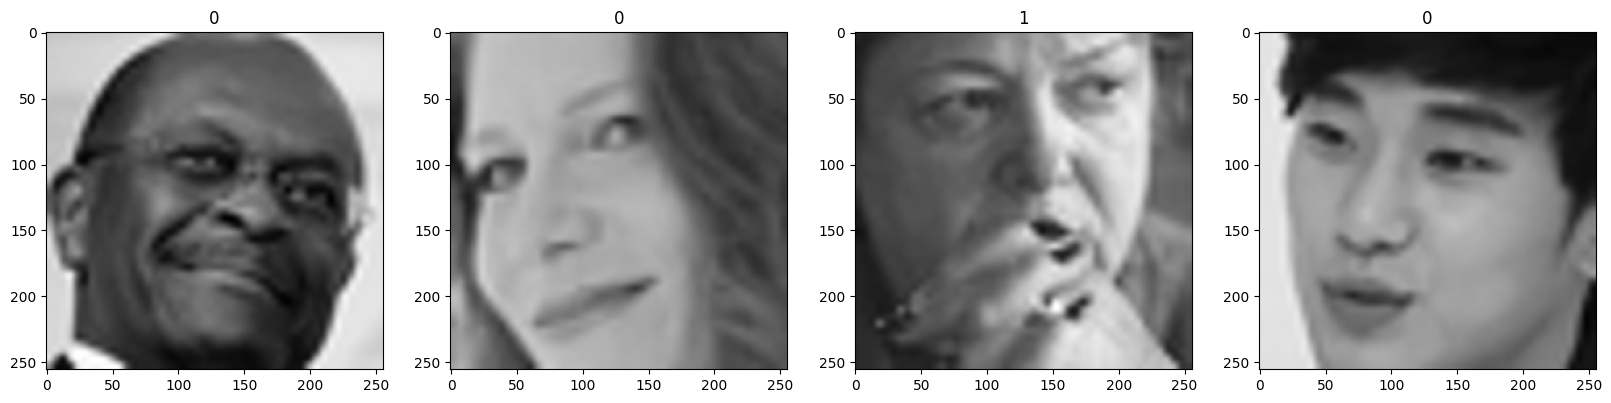

In [25]:
fig,ax = plt.subplots(ncols=4,figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

In [26]:
batch[0].min(),batch[0].max()

(0.0, 1.0)

In [27]:

len(data)

471

In [28]:
train_size = int(len(data) * 0.7)
test_size = int(len(data) * 0.1) + 1
validation_size = int(len(data) * 0.2)

In [29]:
print(train_size+test_size+validation_size)

471


In [30]:
train = data.take(train_size)
val = data.skip(train_size).take(validation_size)
test = data.skip(train_size+validation_size).take(test_size)

In [31]:
len(train),len(test),len(val)

(329, 48, 94)

In [32]:
from tensorflow.keras.applications import ResNet50, VGG16, InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
import numpy as np
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard


In [33]:
# Load InceptionV3 base model
base_model = InceptionV3(weights='imagenet', include_top=False)

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

# Create the model
model_inception = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model_inception.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

87910968/87910968 [==============================] - 5s 0us/step


In [34]:
# Define callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6, verbose=1)

In [35]:
from genericpath import exists
logdir= 'logs'
if not logdir:
  os.mkdir(path=logdir)
else:
  print('Logs file already exists')

Logs file already exists


In [36]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [37]:
hist = model_inception.fit(train,epochs=20,validation_data=val,callbacks=[early_stop, reduce_lr, tensorboard_callback])

Epoch 1/20
329/329 [==============================] - 30s 61ms/step - loss: 0.4825 - accuracy: 0.7746 - val_loss: 0.4174 - val_accuracy: 0.8022 - lr: 0.0010
Epoch 2/20
329/329 [==============================] - 18s 56ms/step - loss: 0.3877 - accuracy: 0.8210 - val_loss: 0.3715 - val_accuracy: 0.8344 - lr: 0.0010
Epoch 3/20
329/329 [==============================] - 18s 56ms/step - loss: 0.3611 - accuracy: 0.8391 - val_loss: 0.3749 - val_accuracy: 0.8348 - lr: 0.0010
Epoch 4/20
329/329 [==============================] - 19s 57ms/step - loss: 0.3384 - accuracy: 0.8514 - val_loss: 0.3713 - val_accuracy: 0.8308 - lr: 0.0010
Epoch 5/20
329/329 [==============================] - 19s 57ms/step - loss: 0.3278 - accuracy: 0.8551 - val_loss: 0.3526 - val_accuracy: 0.8484 - lr: 0.0010
Epoch 6/20
329/329 [==============================] - 19s 56ms/step - loss: 0.3041 - accuracy: 0.8651 - val_loss: 0.3596 - val_accuracy: 0.8477 - lr: 0.0010
Epoch 7/20
329/329 [==============================] - 19s 

In [38]:
hist

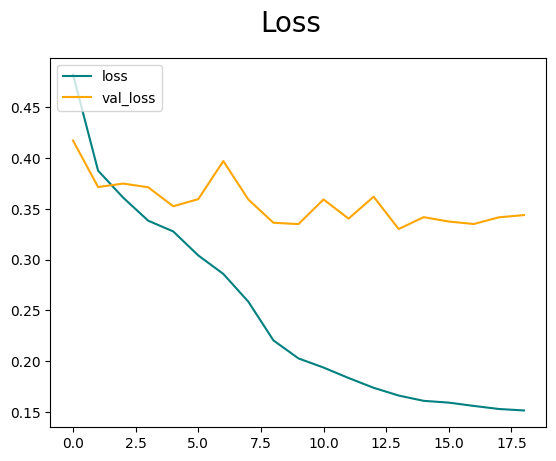

In [39]:
fig = plt.figure()
plt.plot(hist.history['loss'],color='teal', label='loss')
plt.plot(hist.history['val_loss'],color='orange', label='val_loss')
plt.suptitle('Loss',fontsize=20)
plt.legend(loc='upper left')
plt.show()

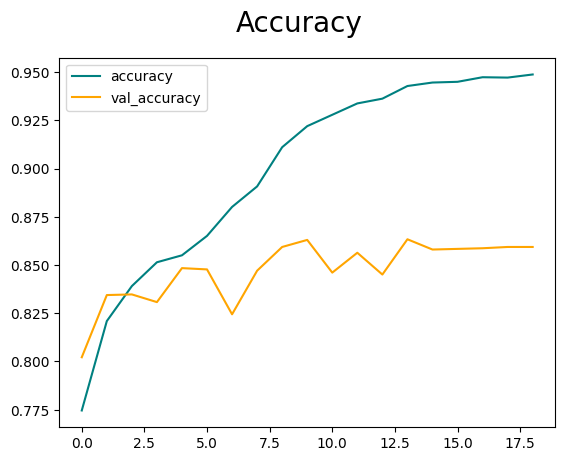

In [40]:
fig = plt.figure()
plt.plot(hist.history['accuracy'],color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'],color='orange', label='val_accuracy')
plt.suptitle('Accuracy',fontsize=20)
plt.legend(loc='upper left')
plt.show()

In [41]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [42]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [43]:
for batch in test.as_numpy_iterator():
  X,y = batch
  yhat = model_inception.predict(X)
  pre.update_state(y,yhat)
  re.update_state(y,yhat)
  acc.update_state(y,yhat)

1/1 [==============================] - 3s 3s/step


In [44]:
print(f'Precision: {pre.result().numpy()} | Recall: {re.result().numpy()} | Accuracy: {acc.result().numpy()}')


Precision: 0.8457627296447754 | Recall: 0.8035426735877991 | Accuracy: 0.8593130707740784


In [45]:
testdata_path = Path('/content/testdata/')
if testdata_path.is_dir():
  print(f'{testdata_path} path already exists.....')
else:
  print(f'Creating {testdata_path} path.....')
  testdata_path.mkdir(parents=True,exist_ok=True)

Creating /content/testdata path.....


In [46]:
import requests

# Download and save happytest.png
with open('/content/testdata/happytest.png', 'wb') as f:
    request = requests.get('https://github.com/raviteja6031/CNN-Image-Classification/raw/main/happytest.png')
    f.write(request.content)

# Download and save sadtest.png
with open('/content/testdata/sadtest.png', 'wb') as f:
    request = requests.get('https://github.com/raviteja6031/CNN-Image-Classification/raw/main/sadtest.png')
    f.write(request.content)

In [47]:
import numpy as np

def classify(yhat: np.ndarray, threshold: float = 0.6) -> np.ndarray:
    # Compare each element of yhat with the threshold
    predicted_classes = np.where(yhat < threshold, 'happy', 'sad')
    return predicted_classes


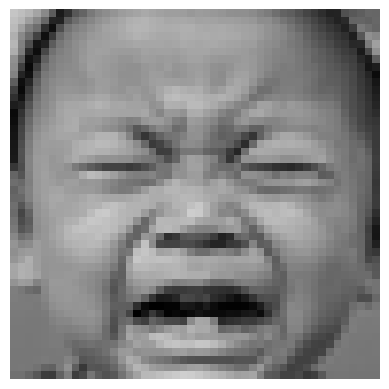

In [48]:
import cv2
import matplotlib.pyplot as plt

# Read sadtest.png from the current directory
sadtest = cv2.imread('/content/testdata/sadtest.png')

# Check if the image is successfully loaded
if sadtest is not None:
    # Convert BGR to RGB and display the image
    plt.imshow(cv2.cvtColor(sadtest, cv2.COLOR_BGR2RGB))
    plt.axis(False)
    plt.show()
else:
    print("Error: Unable to load the image.")

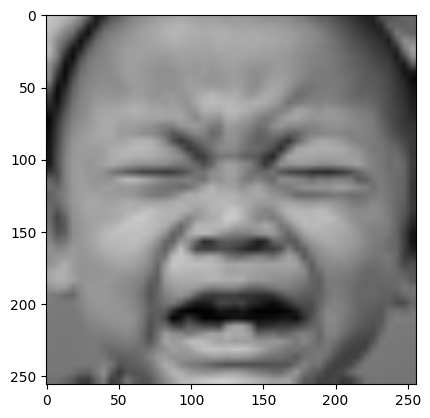

In [49]:
resize = tf.image.resize(sadtest,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [50]:
# Assuming yhat is an array of predicted probabilities
yhat = np.array([0.7, 0.3, 0.8, 0.4])  # Example predicted probabilities

# Call classify function with specified threshold
predicted_classes = classify(yhat, threshold=0.5)
print(f'Predicted classes are {predicted_classes}')


Predicted classes are ['sad' 'happy' 'sad' 'happy']


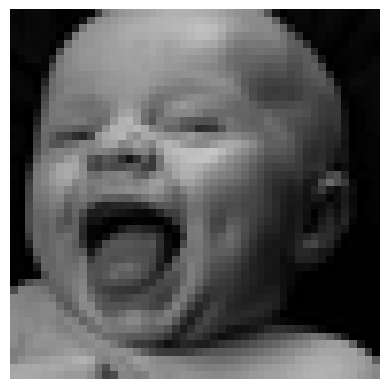

In [51]:
import cv2
import matplotlib.pyplot as plt

# Read happytest.png from the current directory
happytest = cv2.imread('/content/testdata/happytest.png')

# Check if the image is successfully loaded
if happytest is not None:
    # Convert BGR to RGB and display the image
    plt.imshow(cv2.cvtColor(happytest, cv2.COLOR_BGR2RGB))
    plt.axis(False)
    plt.show()
else:
    print("Error: Unable to load the image.")

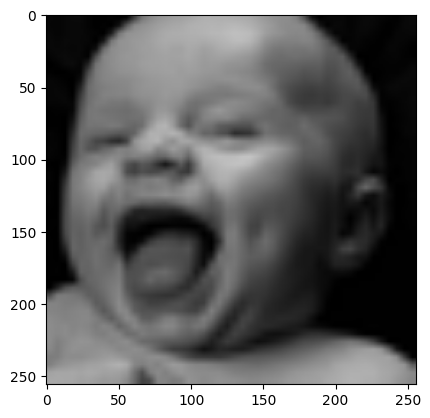

In [52]:
resize = tf.image.resize(happytest,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [53]:
# Assuming yhat is an array of predicted probabilities
yhat = np.array([0.7, 0.3, 0.8, 0.4])  # Example predicted probabilities

# Call classify function with specified threshold
predicted_classes = classify(yhat, threshold=0.5)
print(f'Predicted classes are {predicted_classes}')


Predicted classes are ['sad' 'happy' 'sad' 'happy']
